# Support vector Regression: Student Performance dataset

## Data Preprocessing and Engineering  

### Importing libraries

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

### Loading dataset

In [50]:
df=pd.read_csv("student_performance_dataset.csv", on_bad_lines="skip")
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


In [52]:
df.describe()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


### Exploring dataset

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


### Check for missing values

In [54]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64


### Central Tendency Analysis

In [55]:
print("\n~ Descriptive Statistics ")
display(df.describe())


~ Descriptive Statistics 


,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


### Creating new df with only important variables

In [56]:
df=df.iloc[:,1:-1]
df.head()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score
0,Male,31,68.267841,86,High School,Yes,Yes,63
1,Male,16,78.222927,73,PhD,No,No,50
2,Female,21,87.525096,74,PhD,Yes,No,55
3,Female,27,92.076483,99,Bachelors,No,No,65
4,Female,37,98.655517,63,Masters,No,Yes,70


### Cleaning data

In [57]:
df=df.dropna()
df=df.drop_duplicates()
print(df.isnull().sum().sum())
print("\n")
df.info()

0


<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 707
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      500 non-null    object 
 1   Study_Hours_per_Week        500 non-null    int64  
 2   Attendance_Rate             500 non-null    float64
 3   Past_Exam_Scores            500 non-null    int64  
 4   Parental_Education_Level    500 non-null    object 
 5   Internet_Access_at_Home     500 non-null    object 
 6   Extracurricular_Activities  500 non-null    object 
 7   Final_Exam_Score            500 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 35.2+ KB


### Endocoding categorical values to numerical values

In [58]:
label_encoder=LabelEncoder()
df["Gender"]=label_encoder.fit_transform(df["Gender"])
df["Parental_Education_Level"]=label_encoder.fit_transform(df["Parental_Education_Level"])
df["Internet_Access_at_Home"]=label_encoder.fit_transform(df["Internet_Access_at_Home"])
df["Extracurricular_Activities"]=label_encoder.fit_transform(df["Extracurricular_Activities"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 707
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      500 non-null    int32  
 1   Study_Hours_per_Week        500 non-null    int64  
 2   Attendance_Rate             500 non-null    float64
 3   Past_Exam_Scores            500 non-null    int64  
 4   Parental_Education_Level    500 non-null    int32  
 5   Internet_Access_at_Home     500 non-null    int32  
 6   Extracurricular_Activities  500 non-null    int32  
 7   Final_Exam_Score            500 non-null    int64  
dtypes: float64(1), int32(4), int64(3)
memory usage: 27.3 KB


### Checking for multicollinearity through corrolation heatmap

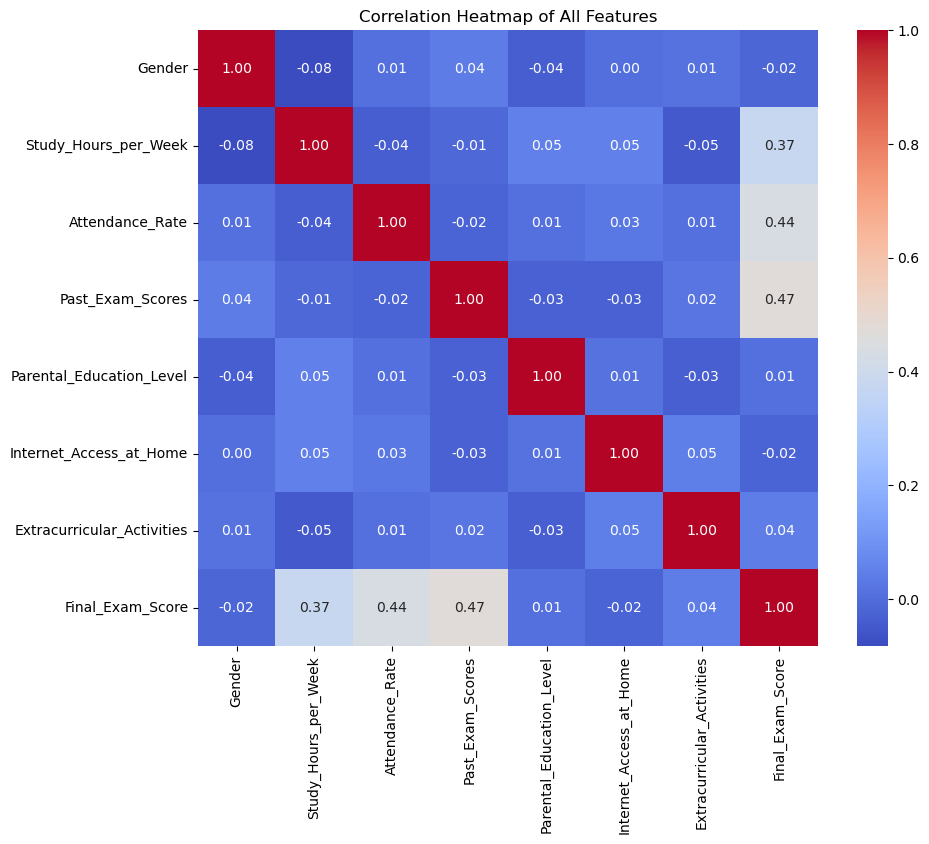

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of All Features")
plt.show()

In [60]:
#Computing z-scores
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
z_scores = np.abs(stats.zscore(df[num_cols]))
z_score_threshold = 3

#Counting outliers per feature
outlier_counts = (z_scores > z_score_threshold).sum(axis=0)
print("Number of outliers per numeric column (|z| > 3):\n")
print(outlier_counts)

Number of outliers per numeric column (|z| > 3):

Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              2
dtype: int64


In [72]:
upper = df['Final_Exam_Score'].quantile(0.99)
lower = df['Final_Exam_Score'].quantile(0.01)
df['Final_Exam_Score'] = np.clip(df['Final_Exam_Score'], lower, upper)
print(outlier_counts)

Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              2
dtype: int64


In [62]:
#splitting and training data
x=df.iloc[:,:7]
y=df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.head(),"\n---------------------")
print(y_train.head())

     Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
294       1                    33        95.775684                89   
582       1                    12        93.175907                66   
19        0                    39        85.197307                62   
402       1                    25        95.028615                65   
417       0                    28        58.336538                51   

     Parental_Education_Level  Internet_Access_at_Home  \
294                         2                        1   
582                         3                        0   
19                          3                        1   
402                         2                        1   
417                         0                        0   

     Extracurricular_Activities  
294                           0  
582                           0  
19                            0  
402                           1  
417                           0   
-------------

In [63]:
#standardizing training data

col_to_scale=["Study_Hours_per_Week","Attendance_Rate","Past_Exam_Scores","Parental_Education_Level"]
s_scaler=StandardScaler()

x_train[col_to_scale]=s_scaler.fit_transform(x_train[col_to_scale])
x_test[col_to_scale]=s_scaler.transform(x_test[col_to_scale])
x_train.head()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities
294,1,0.853246,1.422129,0.974384,0.431122,1,0
582,1,-1.477573,1.232346,-0.632703,1.329294,0,0
19,0,1.519195,0.649911,-0.912197,1.329294,1,0
402,1,-0.034685,1.367593,-0.702577,0.431122,1,1
417,0,0.298289,-1.310915,-1.680804,-1.365221,0,0


In [64]:
# creating the pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVR())                
])

In [65]:
#pipeline integration
param_grid = {
    "model__C": [1, 5, 10, 100],
    "model__epsilon": [0.5, 1, 2 ,5 ,10],
    "model__gamma": ['scale', 0.001, 0.01, 0.1, 1],
    "model__kernel":["rbf"]

}

grid = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='r2', n_jobs=-1, verbose=2)
grid.fit(x_train, y_train)
print(grid.best_params_)
print("Best CV R²:", grid.best_score_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'model__kernel': 'rbf', 'model__gamma': 0.1, 'model__epsilon': 0.5, 'model__C': 5}
Best CV R²: 0.5786560521242347


In [66]:
#training data 
svr=SVR(kernel="rbf",C=10, epsilon= 2, gamma=0.01)
svr.fit(x_train, y_train)

SVR(C=10, epsilon=2, gamma=0.01)

In [67]:
#making the prediction and evaluation:
y_pred=svr.predict(x_test)

r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2.84
Mean Squared Error (MSE): 13.02
Root Mean Squared Error (RMSE): 3.61
R² Score: 0.5980


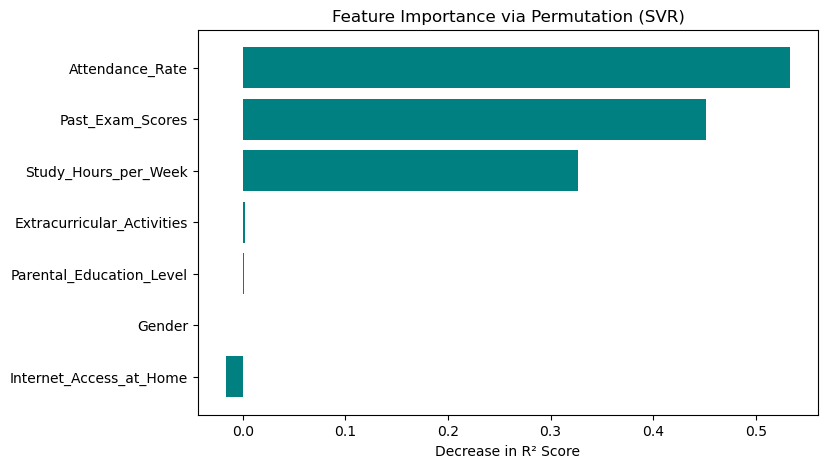

In [68]:
perm_importance = permutation_importance(svr, x_test, y_test, scoring='r2', n_repeats=30, random_state=42)

# Sort by importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot feature importance
plt.figure(figsize=(8,5))
plt.barh(x_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx], color="teal")
plt.xlabel("Decrease in R² Score")
plt.title("Feature Importance via Permutation (SVR)")
plt.show()


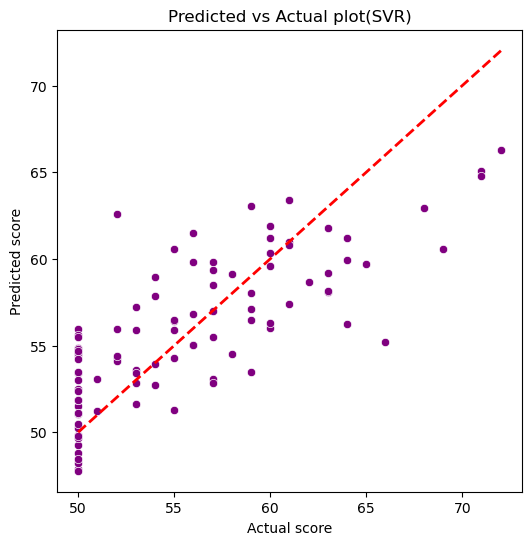

In [69]:
#Predicted vs Actual plot:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test,y=y_pred,color='purple')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--",lw=2)
plt.title("Predicted vs Actual plot(SVR)")
plt.ylabel("Predicted score")
plt.xlabel("Actual score")
plt.show()


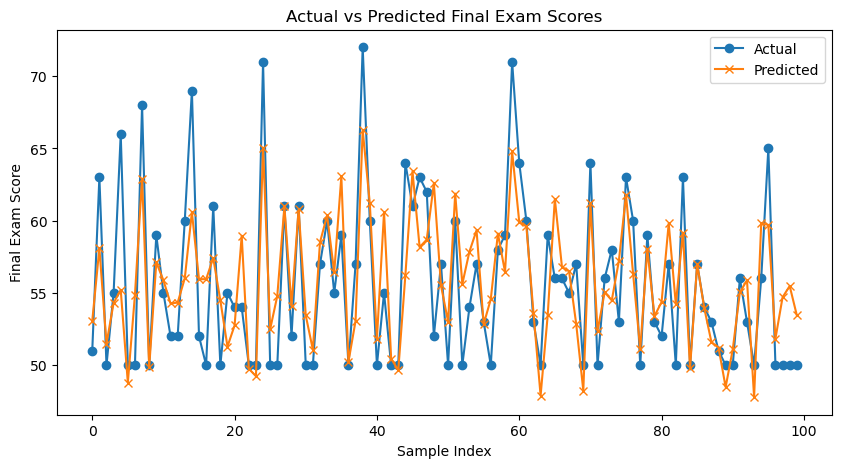

In [70]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted Final Exam Scores")
plt.xlabel("Sample Index")
plt.ylabel("Final Exam Score")
plt.legend()
plt.show()

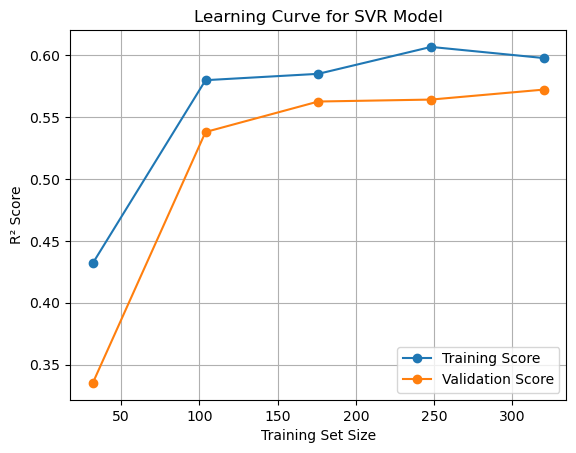

In [71]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(svr, x_train, y_train, cv=5, scoring='r2')
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, 'o-', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', label='Validation Score')
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve for SVR Model")
plt.legend()
plt.grid(True)
plt.show()